#### **Course**: Machine Learning
- **Teaching Staff**
 - Alípio Jorge
 - Inês Dutra

**Assignment nº 1**
- **Group B**:
 - Ana Raquel Maceiras (200604342) 
 - Hélder Vieira (up201503395)
 - Miguel Tavares (up200902937)
 - Rui Vieira (201403035) 

- **Question1**: How can we find an approximate decision boundary?
 - For the dataset Pima: #**done**
  * Plot each pair of variables and class # **done**
  * Choose two adequate attributes that seem to separate classes reasonably well #**done**
  * Compare the behavior of three methods: kNN; logistic regression and quadratic discriminant analysis.#**done**
  * Try different values for k
 - Choose empirically the best value for k. Demonstrate graphically. # determinar o valor de K por cross-validation, e erro de generalização  
  * Use plotting to identify situations where overfitting and underfitting occur.

In [1]:
# np.meshgrid, np.c_, np.contourf?

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, validation_curve, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, zero_one_loss


from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier

In [3]:
db = pd.read_csv("diabetes.csv")
db.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [166]:
# features
x = db.drop(["Outcome"], axis = 1) # pandas dataframe
# target
y = db.Outcome # pandas series

In [167]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [168]:
x.loc[x["Insulin"] == 0].shape[0]

374

In [169]:
columns = x.columns
zeros_diabetes = pd.DataFrame([[col, x.loc[x[col] ==0].shape[0]] for col in columns], columns = ["Feature", "Zero Count"])
zeros_diabetes

,Feature,Zero Count
0,Pregnancies,111
1,Glucose,5
2,BloodPressure,35
3,SkinThickness,227
4,Insulin,374
5,BMI,11
6,DiabetesPedigreeFunction,0
7,Age,0


In [5]:
db.info() # Não há NA values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
y.unique()

array([1, 0], dtype=int64)

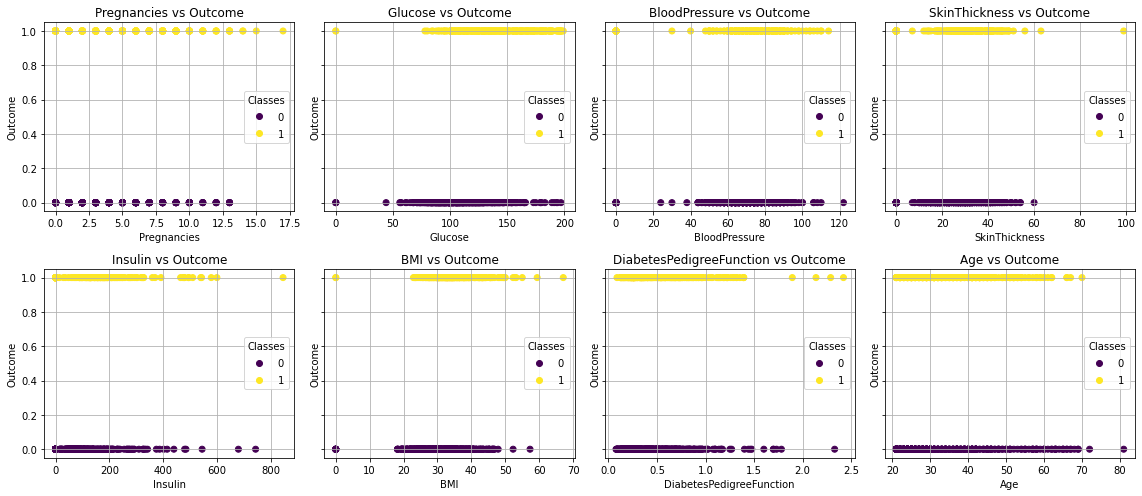

In [7]:
# version with np.ravel()
fig, axs = plt.subplots(2,4, figsize = (16,7), sharey=True) # cada axes é uma 2-D array

axs_idx = axs.ravel() # converte uma 2-D array numa 1-D, onde cada elemento é um axes/subplot
#Info: https://stackoverflow.com/questions/37971541/how-does-the-indexing-of-subplots-work
#https://stackoverflow.com/questions/27569306/populating-matplotlib-subplots-through-a-loop-and-a-function
for i, name in enumerate(x.columns): # Dá-me a posição e nome dos features da minha dataframe "x"
    axs_idx[i].set_title(f"{name} vs {y.name}")
    axs_idx[i].set_xlabel(f"{name}")
    axs_idx[i].set_ylabel(f"{y.name}")
    scatter = axs_idx[i].scatter(x[name], y, c = y)
    axs_idx[i].legend(*scatter.legend_elements(), loc = "center right", title = "Classes")
    axs_idx[i].grid(True)
    

plt.tight_layout()
plt.show()
    

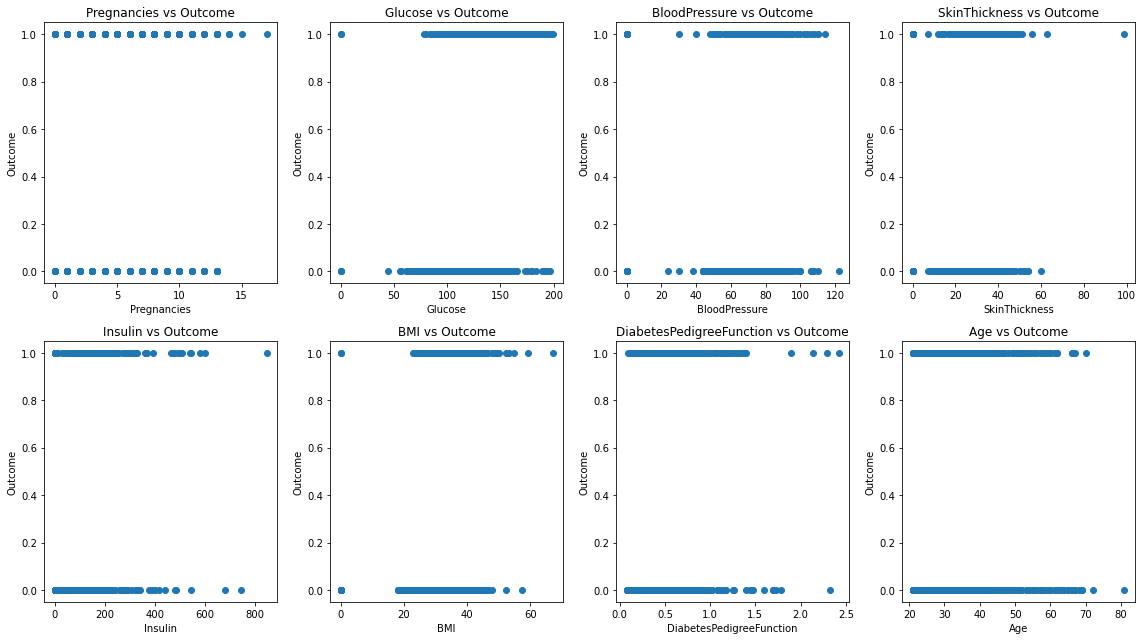

In [8]:
#remove
# version w/ fig.add_subplot(n,m,p) n rows, m columns, position p
fig = plt.figure(figsize=(16,9))

for i, name in enumerate(x.columns):
    ax = fig.add_subplot(2, 4, 1 + i)
    ax.set_title(f"{name} vs {y.name}")
    ax.set_xlabel(f"{name}")
    ax.set_ylabel(f"{y.name}")
    ax.scatter(x[name], y)
    
plt.tight_layout()
plt.show()

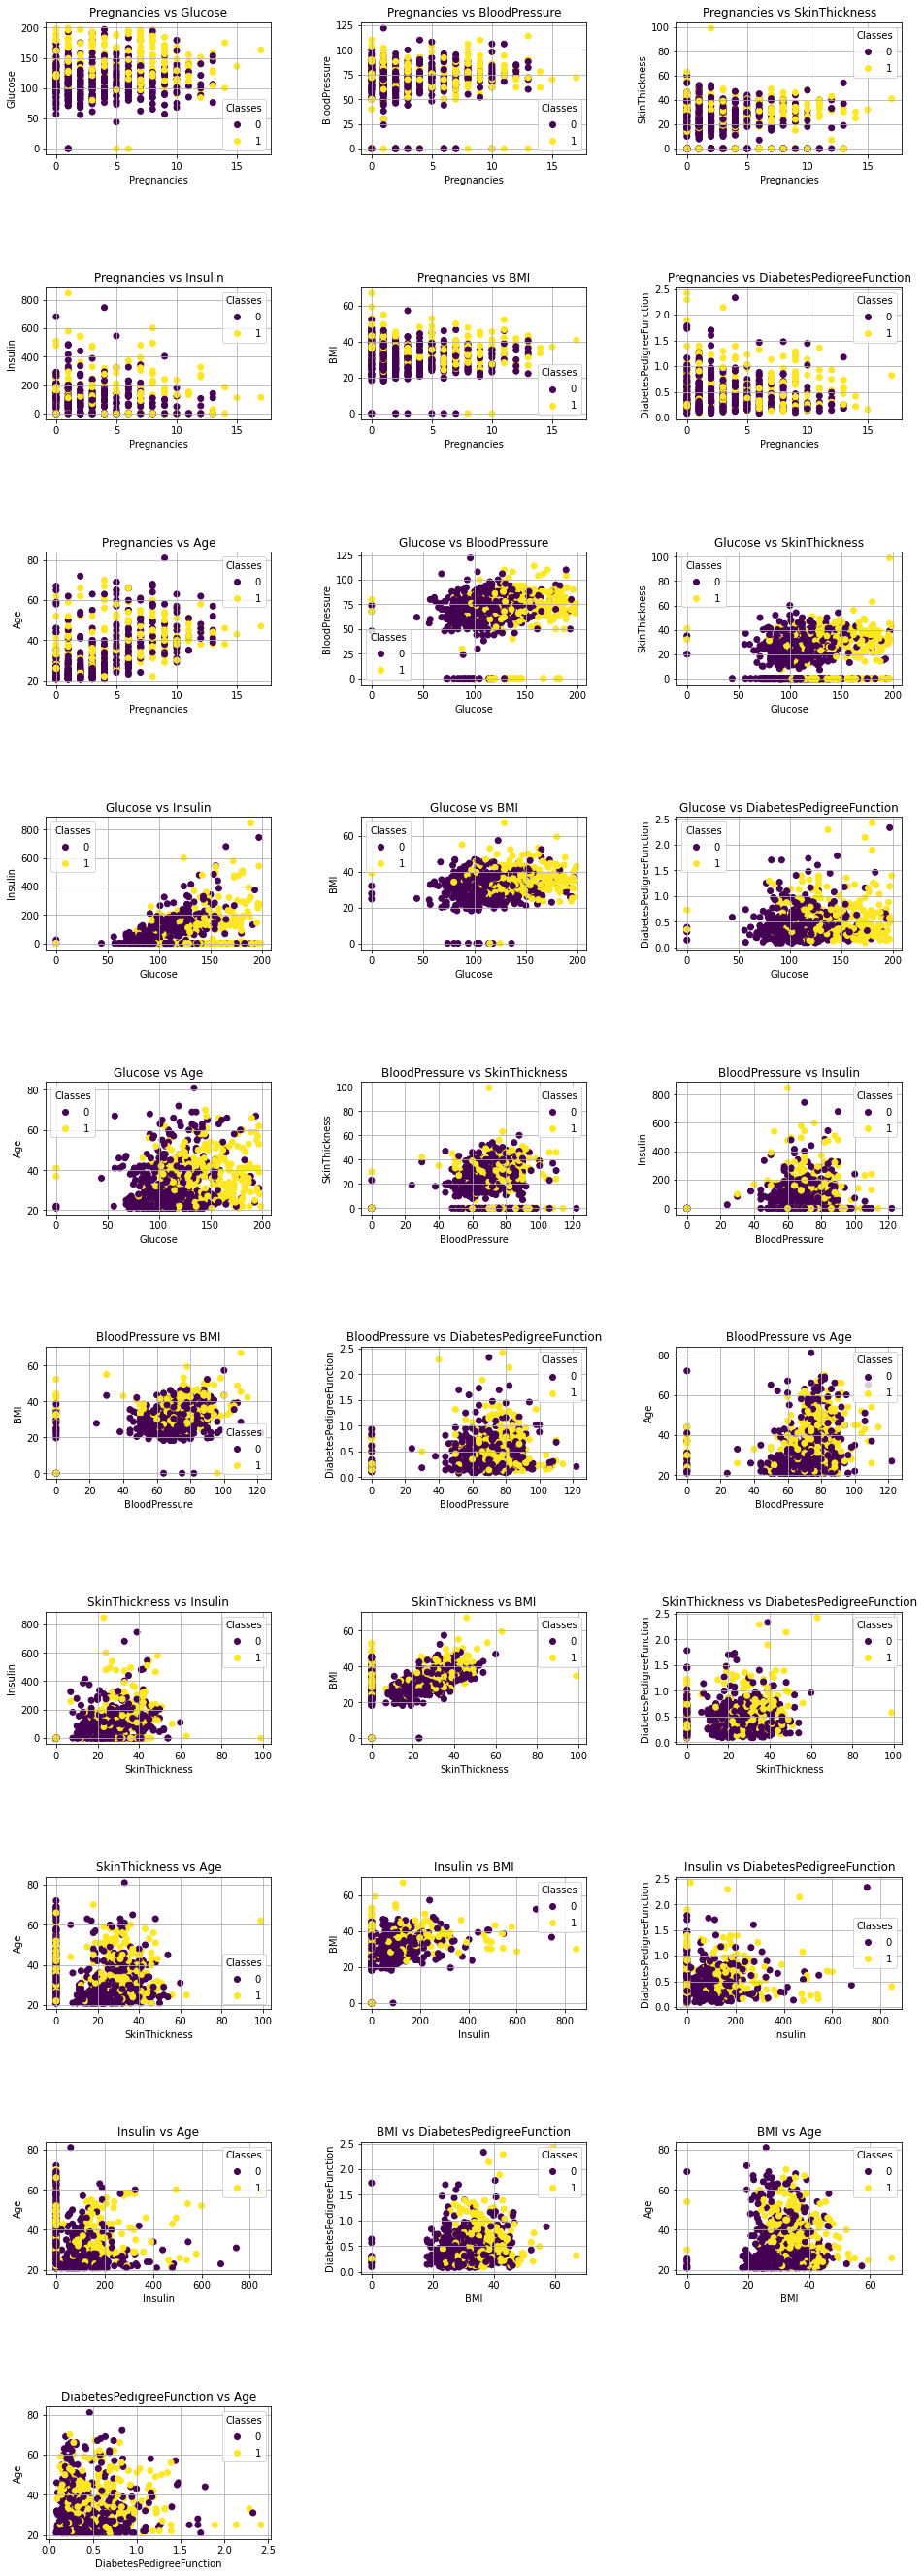

In [9]:
fig = plt.figure(figsize = (7,20))

it = 1
for i in range(len(x.columns)):
    for j in range(i+1,len(x.columns)):
        ax = fig.add_subplot(10,3, it)
        ax.set_title(f"{x.columns[i]} vs {x.columns[j]}")
        ax.set_xlabel(f"{x.columns[i]}")
        ax.set_ylabel(f"{x.columns[j]}")
        scatter = ax.scatter(x[x.columns[i]], x[x.columns[j]], c= y)
        ax.legend(*scatter.legend_elements(), loc = "best", title = "Classes")
        ax.grid(True)
        it+=1
plt.subplots_adjust(left=0.05, 
                    bottom=0.1,  
                    right=1.8,  
                    top=1.9,  
                    wspace=0.4,  
                    hspace=1.0)
plt.show()   

In [10]:
# Dicotomias de descritores onde pode haver uma separação linear

# glucose vs Blood pressure,
# glucose vs skin thickness,
# glucose vs insulin
# glucose vs age,
# glucose vs BMI
# glucose vs Diabetes Pedigree Fucntion
# BMI vs age
# BMI vs Diabetes Pedigree function

In [11]:
# Selected: glucose and BMI

In [12]:
# talvez com um PCA ou Decision tree seja mais fácil determina um número de features adequados

### Outlier Detection: as previsões do modelo melhoram com a remoção dos outliers?

In [13]:
glu_info = db.Glucose.describe()
bmi_info = db.BMI.describe()
glu_info # glucose levels (mg/L) vai de 72 a >235
#https://www.healthhub.sg/a-z/diseases-and-conditions/669/blood-glucose-monitoring

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

In [14]:
bmi_info # BMI vai de <18 a >30 
#https://simple.wikipedia.org/wiki/Body_mass_index

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

### Visualização das distribuições das variáveis contínuas: "Glucose" e "BMI"

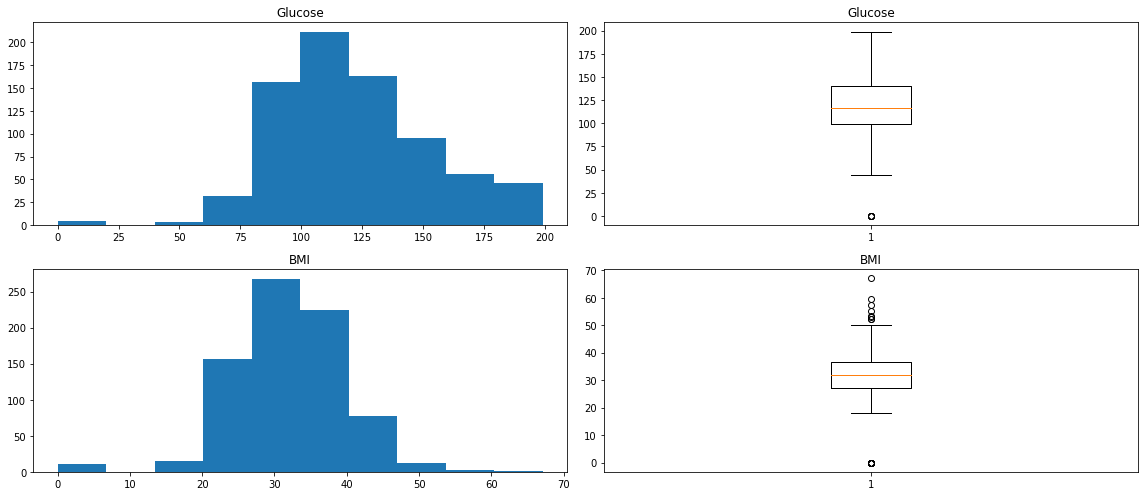

In [15]:
fig, axs = plt.subplots(2,2, figsize = (16,7))

axs_id = axs.ravel()
features = np.array([db.Glucose, db.BMI])
names = ["Glucose", "BMI"]

it = 0
for row in axs:
    row[0].hist(features[it]) 
    row[0].set_title(f"{names[it]}")
    row[1].boxplot(features[it])
    row[1].set_title(f"{names[it]}")
    it+=1
    
plt.tight_layout()    
plt.show()

In [16]:
db.loc[(db.Glucose == 0) | (db.BMI==0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
75,1,0,48,20,0,24.7,0.140,22,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
371,0,118,64,23,89,0.0,1.731,21,0


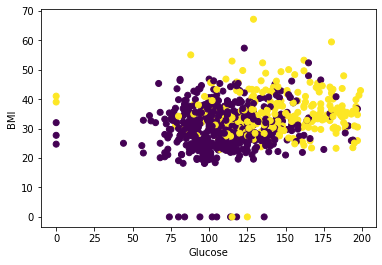

In [17]:
ax = plt.axes()

ax.scatter(db.Glucose, db.BMI, c = y)
ax.set_xlabel("Glucose")
ax.set_ylabel("BMI")

plt.show()

###  Experiência 1: Remoção dos datapoints onde "Glucose" == 0 & "BMI" == 0

#**Comentário**: 
 - Quero verificar se o Prediction Score melhora
 
 - db1 contém "Glucose" e "BMI" == 0
 - db2 não contém "Glucose" e "BMI" == 0

(752, 9)


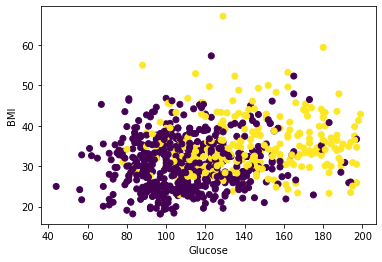

In [203]:

db2 = db.loc[(db.Glucose!=0) & (db.BMI!=0)]
# features
x2 = db2.drop(["Outcome"], axis = 1) # pandas dataframe
# target
y2 = db2.Outcome # pandas series

print(db2.shape)

ax = plt.axes()

ax.scatter(db2.Glucose, db2.BMI, c = y2)
ax.set_xlabel("Glucose")
ax.set_ylabel("BMI")

plt.show()

In [136]:
db2.shape

(752, 9)

* **Pergunta**: O Prediction Score melhora?

### Experiência 2: Transformação das variáveis para um intervalo [0-1]

#**Comentário**: 
 - Quero verificar visualmente se há alguma mudança

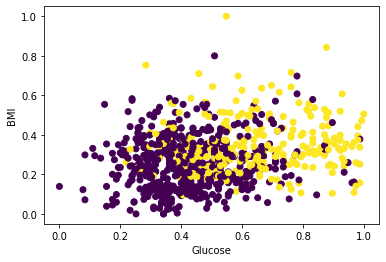

In [171]:
x22 = x2.loc[:,["Glucose", "BMI"]]

mms = MinMaxScaler()
x22_scaled = x22.copy()
x22_scaled.loc[:,["Glucose", "BMI"]] = mms.fit_transform(x22_scaled)

ax = plt.axes()

ax.scatter(x22_scaled.Glucose, x22_scaled.BMI, c = y2)
ax.set_xlabel("Glucose")
ax.set_ylabel("BMI")

plt.show()

In [211]:
x22_scaled

,Glucose,BMI
0,0.670968,0.314928
1,0.264516,0.171779
2,0.896774,0.104294
3,0.290323,0.202454
4,0.600000,0.509202
...,...,...
763,0.367742,0.300613
764,0.503226,0.380368
765,0.496774,0.163599
766,0.529032,0.243354


#**Comentário**:
 - Não se observam mudanças significativas visualmente
 - Fazer "processing: transformation: Min-max scaling" não aparenta ser necessário...
 
#**Pergunta**: Fará diferença na performance? 
 - **Previsão**: Não

In [204]:
# Hold-out 70-30% without shuffling, class stratification

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42, stratify = y)
X2_train, X2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.3, random_state = 42, stratify =y2)
X22_train, X22_test, y22_train, y22_test = train_test_split(x22, y2, test_size = 0.3, random_state = 42, stratify =y2)

In [173]:
def model_perfomance(model, x_train, x_test, y_train, y_test):
    model = model.fit(x_train,y_train)
    model_pred = model.predict(x_test)
    model_acc = accuracy_score(y_test, model_pred)
    model_clr = classification_report(y_test, model_pred)
    model_01_loss = zero_one_loss(y_test, model_pred, normalize=True)
    print(f"Accuracy Score: {model_acc};\n Report:\n {model_clr}")
    print(f"Zero-One loss: {model_01_loss}", end = "\n\n\n")
    
#Aliases: ex1 - experiência 1, acc - accuracy score, clr - classification report

In [174]:
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=2)
lor = LogisticRegression(max_iter = 200, n_jobs= 2, random_state=42)
qda = QuadraticDiscriminantAnalysis()

In [175]:
# K-Nearest Neighbors
print("Including Outliers")
model_perfomance(knn, X_train, X_test, y_train, y_test) # Including Outliers
print("Excluding outliers")
model_perfomance(knn, X2_train, X2_test, y2_train, y2_test) # Excluding outliers
print("Transformed feature values")
model_perfomance(knn, X22_train, X22_test, y22_train, y22_test ) # Transformed feature values

Including Outliers
Accuracy Score: 0.7186147186147186;
 Report:
               precision    recall  f1-score   support

           0       0.76      0.83      0.79       150
           1       0.62      0.51      0.56        81

    accuracy                           0.72       231
   macro avg       0.69      0.67      0.68       231
weighted avg       0.71      0.72      0.71       231

Zero-One loss: 0.2813852813852814


Excluding outliers
Accuracy Score: 0.7035398230088495;
 Report:
               precision    recall  f1-score   support

           0       0.74      0.84      0.79       147
           1       0.60      0.44      0.51        79

    accuracy                           0.70       226
   macro avg       0.67      0.64      0.65       226
weighted avg       0.69      0.70      0.69       226

Zero-One loss: 0.29646017699115046


Transformed feature values
Accuracy Score: 0.7212389380530974;
 Report:
               precision    recall  f1-score   support

           0   

#**Comentário**: # estes comentários foram feitos antes da estratificação
 - Accuracy & Recall increase with outlier removal
 - Precision increases with data transformation, without decreasing Recall, after outlier removal
 - Misclassification (%) decreases - zero-one loss (aka cost) with outlier removal & data transformation

In [200]:
# Logistic Regression
print("Including Outliers")
model_perfomance(lor, X_train, X_test, y_train, y_test)  # Including Outliers
print("Excluding outliers")
model_perfomance(lor, X2_train, X2_test, y2_train, y2_test) # Excluding outliers
print("Transformed feature values")
model_perfomance(lor, X22_train, X22_test, y22_train, y22_test ) # Transformed feature values

Including Outliers
Accuracy Score: 0.7402597402597403;
 Report:
               precision    recall  f1-score   support

           0       0.77      0.86      0.81       150
           1       0.67      0.52      0.58        81

    accuracy                           0.74       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.73      0.74      0.73       231

Zero-One loss: 0.2597402597402597


Excluding outliers
Accuracy Score: 0.7256637168141593;
 Report:
               precision    recall  f1-score   support

           0       0.75      0.88      0.81       147
           1       0.66      0.44      0.53        79

    accuracy                           0.73       226
   macro avg       0.70      0.66      0.67       226
weighted avg       0.72      0.73      0.71       226

Zero-One loss: 0.2743362831858407


Transformed feature values
Accuracy Score: 0.7748344370860927;
 Report:
               precision    recall  f1-score   support

           0    

#**Comentário**: 
 - Accuracy & Recall increase with outlier removal as well
 - F1 score increases with data transformation, after outlier removal
 - Misclassification (%) decreases - zero-one loss (aka cost) with outlier removal & data transformation

In [177]:
# Quadratic Discriminant Analysis 
print("Including Outliers")
model_perfomance(qda, X_train, X_test, y_train, y_test) # Including Outliers
print("Excluding outliers")
model_perfomance(qda, X2_train, X2_test, y2_train, y2_test) # Excluding outliers
print("Transformed feature values")
model_perfomance(qda, X22_train, X22_test, y22_train, y22_test ) # Transformed feature values

Including Outliers
Accuracy Score: 0.7142857142857143;
 Report:
               precision    recall  f1-score   support

           0       0.77      0.79      0.78       150
           1       0.60      0.57      0.58        81

    accuracy                           0.71       231
   macro avg       0.69      0.68      0.68       231
weighted avg       0.71      0.71      0.71       231

Zero-One loss: 0.2857142857142857


Excluding outliers
Accuracy Score: 0.7256637168141593;
 Report:
               precision    recall  f1-score   support

           0       0.77      0.83      0.80       147
           1       0.63      0.53      0.58        79

    accuracy                           0.73       226
   macro avg       0.70      0.68      0.69       226
weighted avg       0.72      0.73      0.72       226

Zero-One loss: 0.2743362831858407


Transformed feature values
Accuracy Score: 0.7389380530973452;
 Report:
               precision    recall  f1-score   support

           0    

#**Comentário**: # antes da estratificação
 - Accuracy decreases slightly & Recall increases with outlier removal, but increases again with data transformation
 - F1 score increases with outlier removal + data transformation
 - Misclassification (%) increases - zero-one loss (aka cost),but increases again with data transformation

In [26]:
#remove

X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])

X[[2,3], 1] # it's like loc and iloc. X[[2,3]] is selecting the subarrays on the indices 2 and 3, that is, [1,2] and [3,4]

array([2, 4])

In [196]:
def cross_val_scoring(model, x, y, cv, scoring, jobs):
    score = cross_val_score(model = model, x = x,y = y, cv = cv, scoring = scoring, n_jobs = jobs)
    return score

In [195]:
#Knn

cross_val_score(knn, x22, y2, 5, "accuracy", 2)

TypeError: Singleton array array(5) cannot be considered a valid collection.

In [219]:
def plot_classifier_boundary(model,X,h = .05):
    # this function can be used with any sklearn classifier
    # ready for two classes but can be easily extended
    cmap_light = colors.ListedColormap(['lightsteelblue', 'peachpuff'])
    x_min, x_max = X.iloc[:, 0].min()-.2, X.iloc[:, 0].max()+0.2
    y_min, y_max = X.iloc[:, 1].min()-.2, X.iloc[:, 1].max()+0.2
    # generate a grid with step h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    # the method ravel flattens xx and yy
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    plt.xlim((x_min,x_max))
    plt.ylim((y_min,y_max))

cmap = colors.ListedColormap(['blue','orange'])

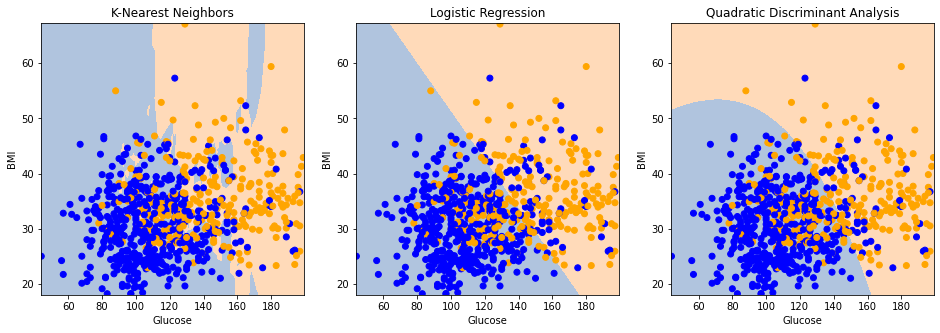

In [223]:
fig = plt.figure(figsize = (16,5))

models = [knn, lor, qda]
names=["K-Nearest Neighbors", "Logistic Regression", "Quadratic Discriminant Analysis"]


for i in range(len(models)):
    ax = fig.add_subplot(1,3, i +1)
    plot_classifier_boundary(models[i], x22, h = .05)
    ax.scatter(x22["Glucose"],x22["BMI"],color=cmap(y2))
    ax.set_title(names[i])
    ax.set_xlabel('Glucose')
    ax.set_ylabel('BMI')
    
plt.show()

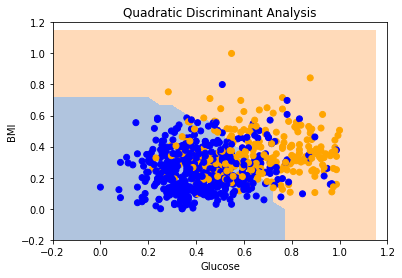

In [222]:
X3_train,X3_test, y3_train, y3_test = train_test_split(x22_scaled, y2, test_size = 0.2, random_state = 1, stratify = y2)

qda_scaled = QuadraticDiscriminantAnalysis().fit(X3_train, y3_train)

plot_classifier_boundary(qda_scaled, x22_scaled, h = .05)
plt.scatter(x22_scaled["Glucose"],x22_scaled["BMI"],color=cmap(y2))
plt.title(names[i])
plt.xlabel('Glucose')
plt.ylabel('BMI')
    
plt.show()

Index onde a accuracy é máxima: 5, começando em 0.
Best number of neighbors is: 51


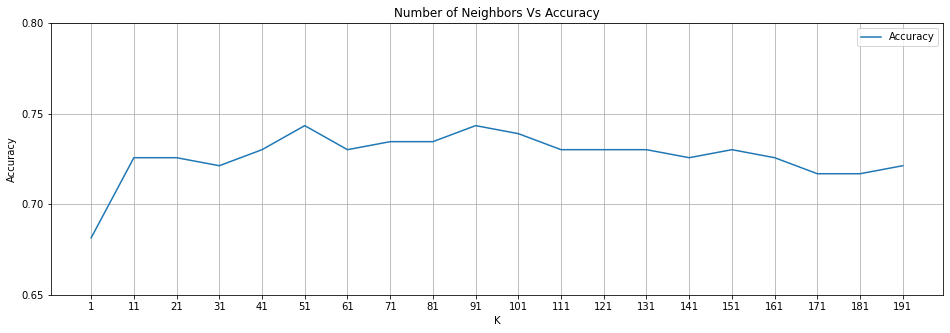

In [186]:
neighbors = np.arange(1,200, 10)

def model_accuracy(model, x_train, x_test, y_train, y_test):
    model = model.fit(x_train,y_train)
    model_pred = model.predict(x_test)
    model_acc = accuracy_score(y_test, model_pred)
    return model_acc

acc_scores = pd.DataFrame([[k, model_accuracy(KNeighborsClassifier(n_neighbors=k, n_jobs=2), X22_train, X22_test, y22_train, y22_test)] for k in neighbors], columns=["K", "Accuracy"])
acc_scores.plot(x = "K", yticks = np.arange(.65,.8,.05), xticks=neighbors, figsize= (16,5),ylabel = "Accuracy", title = "Number of Neighbors Vs Accuracy", grid = True)

index_max_acc = acc_scores.Accuracy.idxmax()
print("Index onde a accuracy é máxima: %d, começando em 0." %index_max_acc)
print("Best number of neighbors is: %d"% acc_scores.loc[index_max_acc, "K"])
plt.show()

#**Comentário**: 
 - The best k seems to be 21 or 41 without holdout stratification
 - The best k seems to be 51 with holdout stratification

Best K is 41


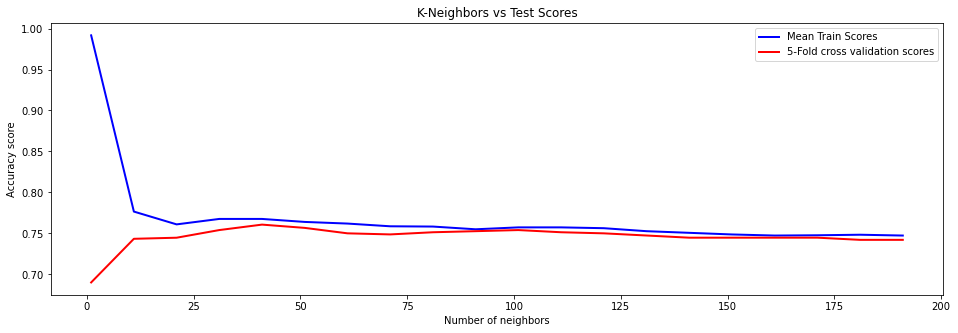

In [205]:
knn2 = KNeighborsClassifier()

train_scores, test_scores = validation_curve(knn2, x22, y2,\
                                             param_name="n_neighbors",\
                                             scoring="accuracy",\
                                             param_range=neighbors)

mean_train_scores = np.mean(train_scores, axis=1)
mean_test_scores = np.mean(test_scores, axis =1)

print("Best K is %d" %int(neighbors[np.where(mean_test_scores == max(mean_test_scores))]))

fig,axs  = plt.subplots(figsize= (16,5))
axs.plot(neighbors, mean_train_scores, label = "Mean Train Scores", color= "blue", lw = 2)
axs.plot(neighbors, mean_test_scores, label = "5-Fold cross validation scores", color= "red", lw = 2)
axs.set_xlabel("Number of neighbors")
axs.set_ylabel("Accuracy score") # which score?
axs.set_title("K-Neighbors vs Test Scores")
axs.legend(loc = "best")

plt.show()

In [31]:
# plot para ver o overfitting e o underfitting
# ver o erro do training e depois test

## Task 2

In [41]:
yeast = pd.read_csv("Yeast-UCI.csv")

yeast.head()

,CYT,NUC,MIT,ME3,ME2,ME1,EXC,VAC,POX,ERL
0,ADT1_YEAST,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,AATM_YEAST,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT


In [42]:
yeast.describe(include = "all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CYT,1484,1462,RL35_YEAST,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NUC,1484,NaN,NaN,NaN,0.500121,0.137299,0.11,0.41,0.49,0.58,1
MIT,1484,NaN,NaN,NaN,0.499933,0.123924,0.13,0.42,0.49,0.57,1
ME3,1484,NaN,NaN,NaN,0.500034,0.0866702,0.21,0.46,0.51,0.55,1
ME2,1484,NaN,NaN,NaN,0.261186,0.137098,0,0.17,0.22,0.32,1
ME1,1484,NaN,NaN,NaN,0.504717,0.048351,0.5,0.5,0.5,0.5,1
EXC,1484,NaN,NaN,NaN,0.0075,0.0756827,0,0,0,0,0.83
VAC,1484,NaN,NaN,NaN,0.499885,0.0577966,0,0.48,0.51,0.53,0.73
POX,1484,NaN,NaN,NaN,0.276199,0.106491,0,0.22,0.22,0.3,1
ERL,1484,10,CYT,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
yeast.describe(include = "object") # the target is ERL

,CYT,ERL
count,1484,1484
unique,1462,10
top,RL35_YEAST,CYT
freq,2,463


In [82]:
x_yeast = yeast.drop(["CYT", "ERL"], axis = 1)
y_yeast = yeast["ERL"]

In [79]:
len(x)

1484

In [80]:
len(y)

1484

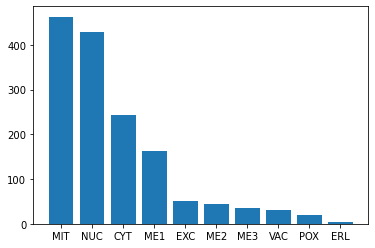

In [85]:
plt.bar(y_yeast.unique(), y_yeast.value_counts())
plt.show()

In [48]:
y_yeast.value_counts()

CYT    463
NUC    429
MIT    244
ME3    163
ME2     51
ME1     44
EXC     35
VAC     30
POX     20
ERL      5
Name: ERL, dtype: int64

### Holdout 70-30%

In [98]:
X_train, X_test, y_train, y_test = train_test_split(x_yeast, y_yeast, test_size = 0.3, random_state = 42, shuffle = True, stratify = y_yeast)

### Models

In [92]:
tree = DecisionTreeClassifier() # class_weight = balanced
knn = KNeighborsClassifier(n_jobs=2)
loreg = LogisticRegression(n_jobs=2, random_state=42)

In [93]:
def model_grid_search(model, param_grid, cv, scoring, n_jobs): # "cv - integer, to specify the number of folds in a `(Stratified) KFold`,"
    model_grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = cv, refit = True, scoring= scoring, n_jobs = n_jobs)
    model_grid.fit(X_train, y_train)
    print(f"Best estimator: {model_grid.best_estimator_} \n  Best score: {model_grid.best_score_} \n Best Params: {model_grid.best_params_}")

### Tree hyperparams tuning

In [103]:
max_depth = [None] + [x for x in np.arange(1,20,4)]
min_sample_split= np.arange(2, 10,2)
min_sample_leaf = np.arange(1,5)
ccp_alpha = np.arange(1,100, 50)

param_grid_tree = {"criterion": ['gini', "entropy"],\
              "splitter": ['best',"random"],\
              "max_depth": max_depth,\
              "min_samples_split": min_sample_split,\
              "min_samples_leaf": min_sample_leaf, \
              "ccp_alpha": ccp_alpha}

In [224]:
tree_grid = model_grid_search(tree, param_grid_tree, 4, "accuracy", 2) 

Best estimator: DecisionTreeClassifier(ccp_alpha=1) 
  Best score: 0.6517689331122167 
 Best Params: {'ccp_alpha': 1, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


### LogRegression hyperparam tuning

**Hyperparams** to tune:
 - C : 0.1 - 10, cost param
 - iteration number: 10 - 200

In [225]:
c = np.linspace(0.1, 10, 10, endpoint=True)
max_iter = np.arange(10, 220, 30)

param_grid_loreg = {"C": c, "max_iter": max_iter}

In [226]:
loreg_grid = model_grid_search(loreg, param_grid_loreg, 4, "accuracy", 2) # dá-me erro se fizer stratify no holdout

Best estimator: LogisticRegression(C=2.3000000000000003, n_jobs=2, random_state=42) 
  Best score: 0.7783996683250414 
 Best Params: {'C': 2.3000000000000003, 'max_iter': 100}


In [128]:
# loreg_ = loreg_grid.best_estimator_

AttributeError: 'NoneType' object has no attribute 'best_estimator_'

### K- neighbors tuning

**Hyperparams** to tune:
 - K : 1 - 50, number of neighbors
 - Distance metric: "manhattan", "euclidean", "minkowski" - is it worth it?

5-fold cross validation - Best accuracy score: 0.586 Best K: 21


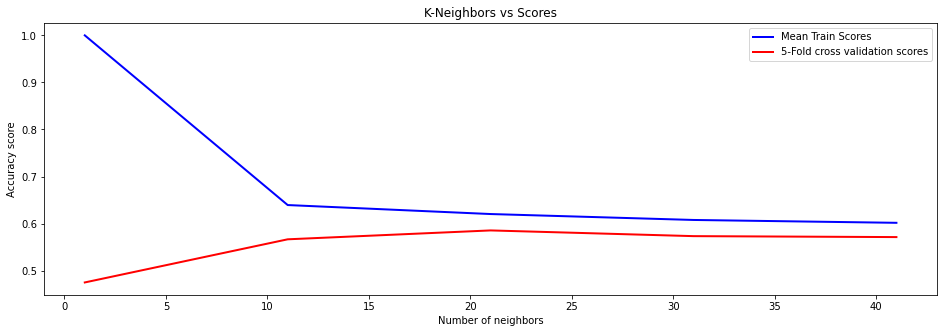

In [227]:
n_neighbors = np.arange(1, 50, 10)

train_scores, test_scores = validation_curve(knn, x_yeast,y_yeast,\
                                             param_name= "n_neighbors",\
                                             param_range=n_neighbors,\
                                             cv = 4,\
                                             scoring = "accuracy")  # cv as above
mean_train_scores = np.mean(train_scores, axis=1)
mean_test_scores = np.mean(test_scores, axis =1)
max_test_score= max(mean_test_scores)
print("5-fold cross validation - Best accuracy score: %0.3f" %max_test_score, "Best K: %s"% int(n_neighbors[np.where(mean_test_scores == max_test_score)]))

fig,axs  = plt.subplots(figsize= (16,5))
axs.plot(n_neighbors, mean_train_scores, label = "Mean Train Scores", color= "blue", lw = 2)
axs.plot(n_neighbors, mean_test_scores, label = "5-Fold cross validation scores", color= "red", lw = 2)
axs.set_xlabel("Number of neighbors")
axs.set_ylabel("Accuracy score") # which score?
axs.set_title("K-Neighbors vs Scores")
axs.legend(loc = "best")

plt.show()

In [228]:
def score_report(model, xtest, ytest):
    model_pred = model.predict(xtest)
    acc_score = accuracy_score(ytest, model_pred)
    cls_report = classification_report(ytest, model_pred)
    print(f"Accuracy: {acc_score},\n Report: {cls_report}")

In [229]:
# Decision tree

score_report(DecisionTreeClassifier(ccp_alpha=1).fit(X_train,y_train), X_test, y_test)

Accuracy: 0.6493506493506493,
 Report:               precision    recall  f1-score   support

           0       0.65      1.00      0.79       150
           1       0.00      0.00      0.00        81

    accuracy                           0.65       231
   macro avg       0.32      0.50      0.39       231
weighted avg       0.42      0.65      0.51       231



C:\Users\rucam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [230]:
#Logistic reg
score_report(LogisticRegression(C=10.0, max_iter=190, n_jobs=2, random_state=42).fit(X_train, y_train), X_test, y_test)

Accuracy: 0.7445887445887446,
 Report:               precision    recall  f1-score   support

           0       0.77      0.87      0.82       150
           1       0.68      0.52      0.59        81

    accuracy                           0.74       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.74      0.74      0.74       231



In [231]:
# KNN

score_report(KNeighborsClassifier(n_neighbors=21).fit(X_train, y_train), X_test, y_test)

Accuracy: 0.7445887445887446,
 Report:               precision    recall  f1-score   support

           0       0.77      0.87      0.82       150
           1       0.68      0.52      0.59        81

    accuracy                           0.74       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.74      0.74      0.74       231

